# CLEANING

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("ksa_solar_dataset_2024_detailed.csv", encoding='latin1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Dataset ini mensimulasikan produksi energi surya per jam selama tahun 2024 di 5 kota besar Arab Saudi, yaitu Riyadh, Jeddah, Mecca, Medina, dan Demmam. Dataset menggabungkan data cuaca realistis, faktor geografis, efisiensi panel, dan orientasi kemiringan untuk memberikan gambaran mengenai performa sistem solar panel.

In [ ]:
df.head()

,Date,City,Latitude,Longitude,Temperature_°C,Weather,Panel_Type,Mount_Type,Tilt_°,Panel_Efficiency_%,Solar_Irradiance_kWh/m²/day,Output_Power_W,Estimated_Daily_Output_kWh
0,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Monocrystalline,Rooftop,25,22,5.39,1.90,21.06
1,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Polycrystalline,Rooftop,25,18,5.39,1.55,21.06
2,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Thin-Film,Rooftop,25,12,5.39,1.04,21.06
3,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Monocrystalline,Ground,15,22,4.97,1.75,19.47
4,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Polycrystalline,Ground,15,18,4.97,1.43,19.47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           10980 non-null  object 
 1   City                           10980 non-null  object 
 2   Latitude                       10980 non-null  float64
 3   Longitude                      10980 non-null  float64
 4   Temperature (°C)               10980 non-null  int64  
 5   Weather                        10980 non-null  object 
 6   Panel Type                     10980 non-null  object 
 7   Mount Type                     10980 non-null  object 
 8   Tilt (°)                       10980 non-null  int64  
 9   Panel Efficiency (%)           10980 non-null  int64  
 10  Solar Irradiance (kWh/m²/day)  10980 non-null  float64
 11  Output Power (W)               10980 non-null  float64
 12  Estimated Daily Output (kWh)   10980 non-null 

In [ ]:
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Jumlah baris: 10980, Jumlah kolom: 13


In [ ]:
print("Kolom yang tersedia:")
print(df.columns.tolist())

Kolom yang tersedia:
['Date', 'City', 'Latitude', 'Longitude', 'Temperature (°C)', 'Weather', 'Panel Type', 'Mount Type', 'Tilt (°)', 'Panel Efficiency (%)', 'Solar Irradiance (kWh/m²/day)', 'Output Power (W)', 'Estimated Daily Output (kWh)']


In [ ]:
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())


Jumlah missing value per kolom:
Date                             0
City                             0
Latitude                         0
Longitude                        0
Temperature (°C)                 0
Weather                          0
Panel Type                       0
Mount Type                       0
Tilt (°)                         0
Panel Efficiency (%)             0
Solar Irradiance (kWh/m²/day)    0
Output Power (W)                 0
Estimated Daily Output (kWh)     0
dtype: int64


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\n Jumlah data duplikat: {duplicate_count}")


 Jumlah data duplikat: 0


In [ ]:
print("\n Statistik deskriptif:")
display(df.describe())


 Statistik deskriptif:


,Latitude,Longitude,Temperature (°C),Tilt (°),Panel Efficiency (%),Solar Irradiance (kWh/m²/day),Output Power (W),Estimated Daily Output (kWh)
count,10980.000000,10980.000000,10980.000000,10980.000000,10980.000000,10980.000000,10980.000000,10980.000000
mean,23.706780,43.076740,30.778689,20.000000,17.333333,6.509765,1.805381,24.042257
std,1.967445,4.469425,8.592400,5.000228,4.109796,0.740830,0.477080,2.323917
min,21.389100,39.192500,18.000000,15.000000,12.000000,4.370000,0.840000,17.150000
25%,21.485800,39.569200,25.000000,15.000000,12.000000,6.077500,1.360000,22.860000
50%,24.524700,39.857900,32.000000,20.000000,18.000000,6.730000,1.880000,24.570000
75%,24.713600,46.675300,40.000000,25.000000,22.000000,7.090000,2.160000,25.760000
max,26.420700,50.088800,43.000000,25.000000,22.000000,7.590000,2.670000,27.920000


Rata-rata 23.7 derajat lintang utara menunjukkan bahwa lokasi berada di zona subtropis dengan jarak Timur-Barat yang luas. variasi bujur lebih besar 4.47 > 1.97 yang menunjukkan kota tersebar secara horizontal.

Kelima kota memiliki rata-rata suhu sebesar 30.78 derajat celcius dengan puncak 43 derajat celcius. Panel surya akan beroprasi 25% saat suhu di atas 40 derajat celcius.

Sudut kemiringan bervariasi sistematis antara 15 hingga 25 derajat. Nilai median sebesar 20 derajat sesuai dengan rata rata lintang 23.7 derajat. Hal ini menunjukkan bahwa data terdistribusi ekperimen secara terkontrol.

Range efisiensi panel surya berada di 12%-22% yang mengindikasikan 3 jenis panel dengan performa yang berbeda.

*Benchmark Global* memiliki rata-rata4.5 kWh/m2/day di dunia, sedangkan Saudi Arabia dengan rata-rata iradiasi 6.51 kWh/m2/day dengan Q1=6.08, hal ini menunjukkan bahwa Saudi Arabia berada di top 5% solar resources globally.



In [ ]:
num_cols = ['Latitude','Longitude','Temperature (°C)',
            'Tilt (°)','Panel Efficiency (%)',
            'Solar Irradiance (kWh/m²/day)',
            'Output Power (W)','Estimated Daily Output (kWh)']

for col in num_cols:
    if (df[col] < 0).any():
        print(f"Perhatian: Ada nilai negatif pada kolom {col}")

In [ ]:
cat_cols = ['City','Weather','Panel Type','Mount Type']
for col in cat_cols:
    print(f"\n Nilai unik kolom {col}:")
    print(df[col].unique())


 Nilai unik kolom City:
['Riyadh' 'Jeddah' 'Mecca' 'Medina' 'Dammam']

 Nilai unik kolom Weather:
['few clouds' 'scattered clouds' 'sunny' 'clear sky']

 Nilai unik kolom Panel Type:
['Monocrystalline' 'Polycrystalline' 'Thin-Film']

 Nilai unik kolom Mount Type:
['Rooftop' 'Ground']


Dataset terdiri dari 10980 observasi tanpa *missing values* dan duplikat. Variabel berjumlah 13 dengan tipe data object, integer, dan float. Terdapat 5 kota, 3 jenis panel surya, 4 kondisi cuaca, dan 2 konfigurasi pemasangan panel surya.

# TRANSFORMASI

Tujuan :
1. Mengubah kolom Date menjadi tipe datetime,
2. Menstandarkan nama kolom seperti Panel Type → Panel_Type,
3. Mengonversi kolom kategorikal (City, Weather, Panel_Type, Mount_Type) menjadi tipe category.

In [ ]:
df.columns = df.columns.str.strip().str.replace('\xa0', '', regex=True)

print(df.columns.tolist())

['Date', 'City', 'Latitude', 'Longitude', 'Temperature (°C)', 'Weather', 'Panel Type', 'Mount Type', 'Tilt (°)', 'Panel Efficiency (%)', 'Solar Irradiance (kWh/m²/day)', 'Output Power (W)', 'Estimated Daily Output (kWh)']


In [ ]:
categorical_cols = ['City', 'Weather', 'Panel Type', 'Mount Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           10980 non-null  datetime64[ns]
 1   City                           10980 non-null  category      
 2   Latitude                       10980 non-null  float64       
 3   Longitude                      10980 non-null  float64       
 4   Temperature (°C)               10980 non-null  int64         
 5   Weather                        10980 non-null  category      
 6   Panel Type                     10980 non-null  category      
 7   Mount Type                     10980 non-null  category      
 8   Tilt (°)                       10980 non-null  int64         
 9   Panel Efficiency (%)           10980 non-null  int64         
 10  Solar Irradiance (kWh/m²/day)  10980 non-null  float64       
 11  Output Power (W

In [ ]:
df.head()

,Date,City,Latitude,Longitude,Temperature (°C),Weather,Panel Type,Mount Type,Tilt (°),Panel Efficiency (%),Solar Irradiance (kWh/m²/day),Output Power (W),Estimated Daily Output (kWh)
0,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Monocrystalline,Rooftop,25,22,5.39,1.90,21.06
1,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Polycrystalline,Rooftop,25,18,5.39,1.55,21.06
2,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Thin-Film,Rooftop,25,12,5.39,1.04,21.06
3,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Monocrystalline,Ground,15,22,4.97,1.75,19.47
4,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Polycrystalline,Ground,15,18,4.97,1.43,19.47


In [ ]:
df.to_csv("ksa_solar_dataset_2024_detailed_DataPreprocessing.csv", index=False)

print("File berhasil disimpan")

File berhasil disimpan


Kolom Date ditransformasi dari tipe object menjadi DateTime64 untuk memungkinkan analisis data time-series. Nama kolom distandarisasi.

# DETEKSI OUTLIER

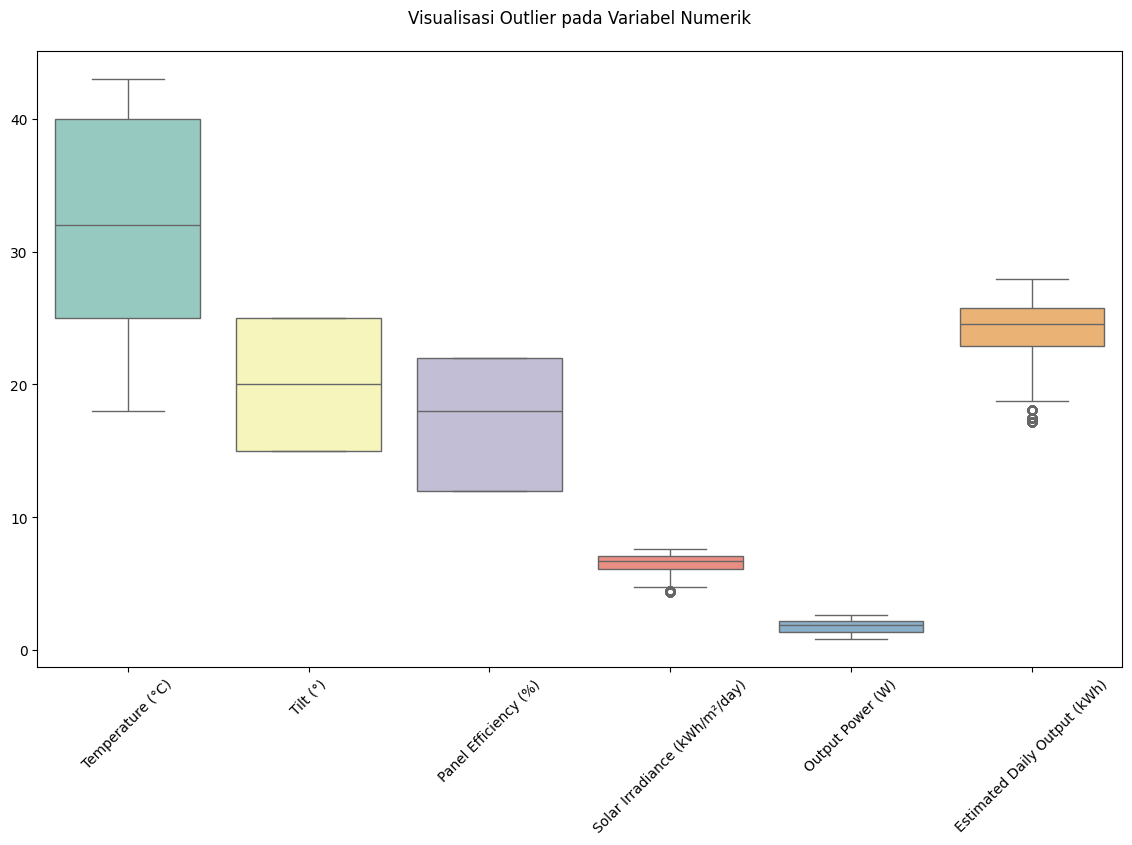

Jumlah outlier per variabel numerik :
Estimated Daily Output (kWh)     276
Solar Irradiance (kWh/m²/day)    186
Tilt (°)                           0
Temperature (°C)                   0
Panel Efficiency (%)               0
Output Power (W)                   0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_cols = [
    'Temperature (°C)',
    'Tilt (°)',
    'Panel Efficiency (%)',
    'Solar Irradiance (kWh/m²/day)',
    'Output Power (W)',
    'Estimated Daily Output (kWh)'
]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[numeric_cols], palette="Set3")
plt.title("Visualisasi Outlier pada Variabel Numerik", pad=20)
plt.xticks(rotation=45)
plt.show()

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

outlier_count = outliers.sum().sort_values(ascending=False)

print("Jumlah outlier per variabel numerik :")
print(outlier_count)

Hasil analisis deteksi outlier menunjukkan bahwa variabel temperature, tilt, panel efficiency, output power tidak menunjukkan outlier. Variabel dengan outlier minor seperti solar irradiance (186 outlier) dan estimated daily output (276 outlier). Outlier tetap dipertahankan karena memiliki justifikasi fisik yang valid dari cuaca ekstrem dan kedua variabel sangat informatif untuk asesmen risiko.

# VISUALISASI DISTRIBUSI

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

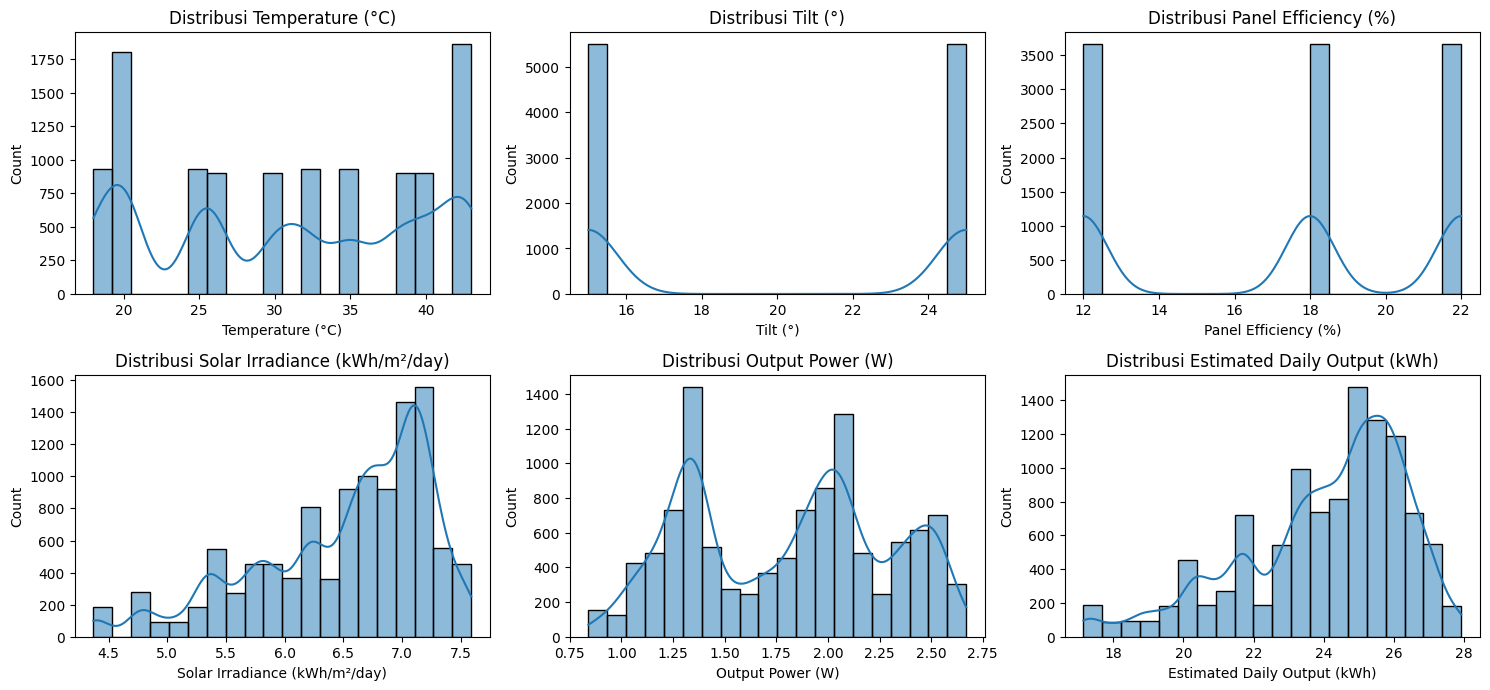

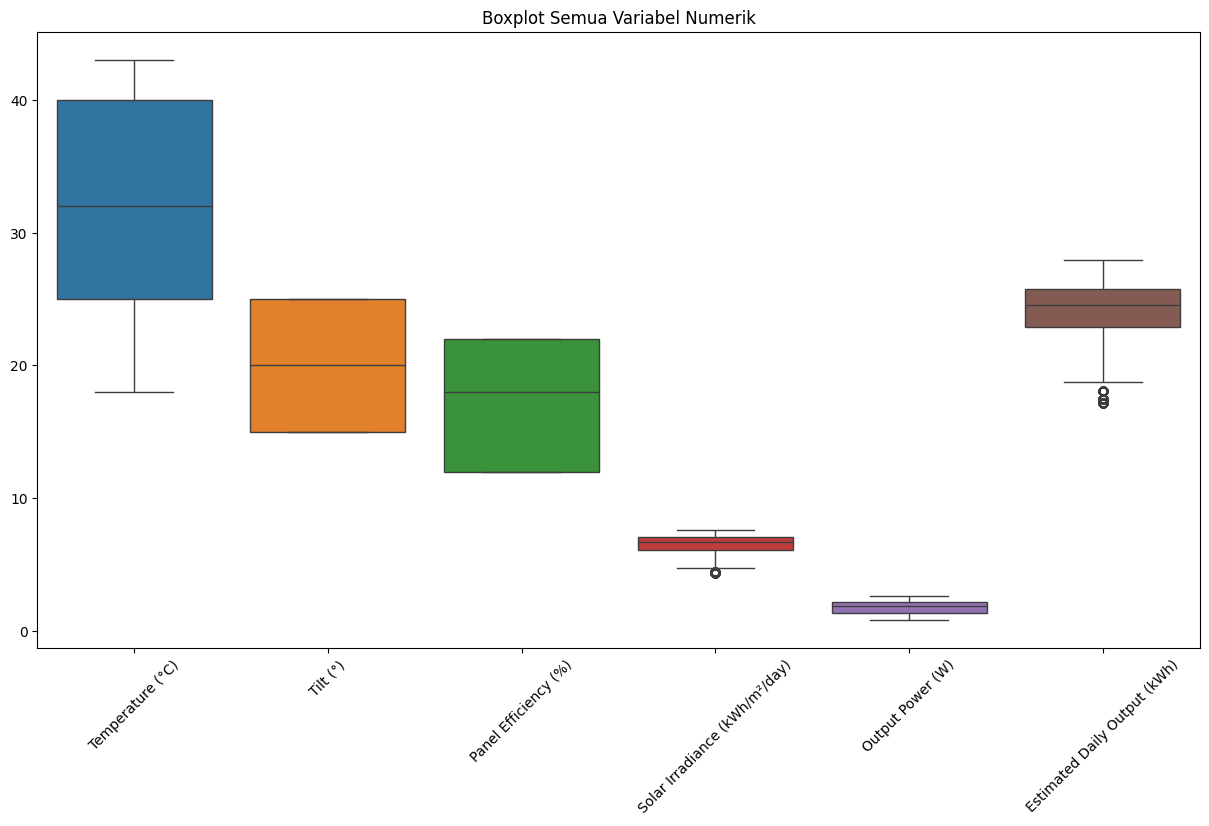

In [ ]:
numeric_cols = [
    'Temperature (°C)', 'Tilt (°)', 'Panel Efficiency (%)',
    'Solar Irradiance (kWh/m²/day)', 'Output Power (W)',
    'Estimated Daily Output (kWh)'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot Semua Variabel Numerik")
plt.xticks(rotation=45)
plt.show()

Temperatur menunjukkan pola bimodal (dua puncak) khas iklim gurun dengan ekstrem. Puncak pertaam berada di sekitar 20 derajat celcius dna puncak kedua di sekitar 40 derajat celcius. Hal ini dikarenakan Arab Saudi memiliki perbedaan suhu pada malam dan pagi hari.

Distribusi tilt menunjukkan pola tri modal uniform dengan tiga puncak identik di sudut 15, 20, dan 25 derajat. Begitupula dengan distribusi panel efficiency. Terdapat tiga puncak di 125, 18%, dan 22%. Tiga puncak ini merepresentasikan tiga jenis teknologi panel yang berbeda seperti Thin-Film (12%), Polycrystalline (18%), dan Monocrystalline (22%).

Distribusi Solar Irradiance menunjukkan pola right-skewed (miring ke kanan) dengan puncak di sekitar 7.3 kWh/m²/day. Pola ini sangat positif karena menunjukkan bahwa mayoritas waktu (sekitar 70%) Arab Saudi memiliki iradiasi matahari yang sangat tinggi dan mendekati maksimum teoritis.

Distribusi Output Power adalah yang paling kompleks dengan pola multi-modal (4-5 puncak) tersebar di range 0.84-2.67 kW. Kompleksitas ini masuk akal karena Output Power adalah hasil kombinasi dari semua variabel lain—efisiensi panel (3 tipe), iradiasi matahari (bervariasi), suhu (bimodal), dan sudut kemiringan (3 level).

Distribusi Estimated Daily Output menunjukkan pola yang jauh lebih halus dan mendekati distribusi normal (bell curve) dengan puncak di 24-26 kWh. Ini berbeda drastis dari Output Power yang multi-modal karena Daily Output adalah akumulasi dari 24 jam pengukuran.

Pertama, semua distribusi menunjukkan pola yang realistic dan logis tanpa anomali ekstrem, mengkonfirmasi kualitas data yang sangat baik. Kedua, Arab Saudi memiliki keunggulan kompetitif luar biasa dalam solar energy dengan iradiasi konsisten tinggi yang menempatkannya di liga teratas global. Ketiga, terdapat hierarchy of influence yang jelas—Solar Irradiance dan Panel Efficiency adalah faktor dominan yang paling mempengaruhi output (dengan perbedaan hingga 83%), diikuti Temperature dengan pengaruh moderate, dan Tilt dengan pengaruh paling kecil sebagai fine-tuning optimization.

# KORELASI MATRIKS HEATMAP ANTAR SELURUH VARIABEL

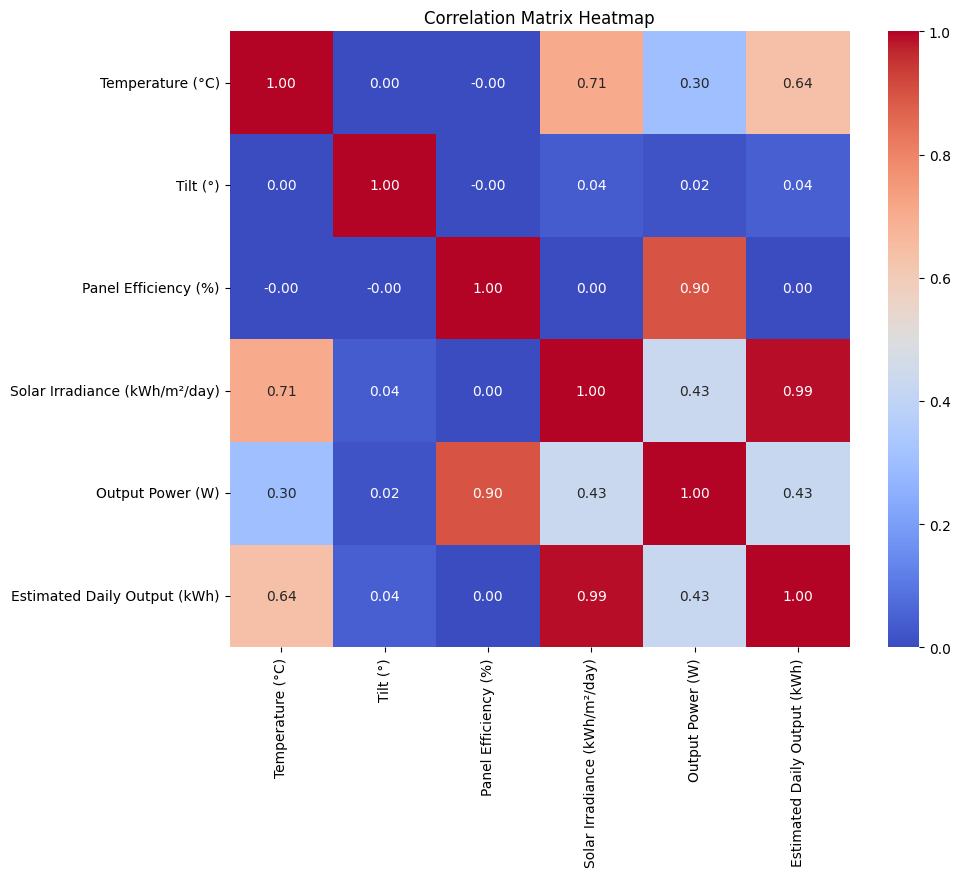

In [ ]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# KORELASI ANTARA SUHU VS EFISIENSI PANEL

Korelasi antara suhu ambient dan efisiensi panel

Korelasi suhu dengan efisiensi panel: -0.000


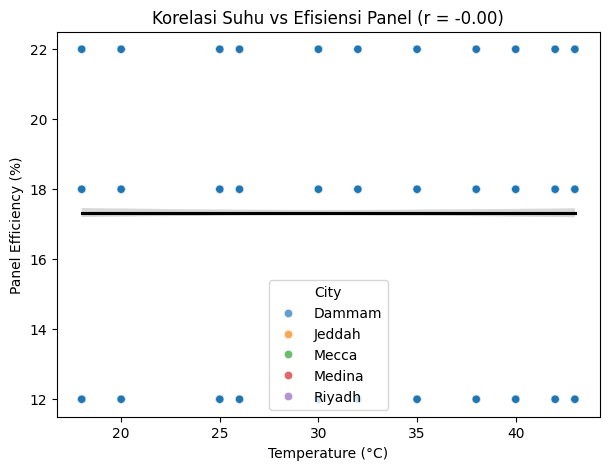

In [ ]:
import numpy as np

corr_temp_eff = df['Temperature (°C)'].corr(df['Panel Efficiency (%)'])
print(f"Korelasi suhu dengan efisiensi panel: {corr_temp_eff:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Temperature (°C)', y='Panel Efficiency (%)', hue='City', alpha=0.7)
sns.regplot(data=df, x='Temperature (°C)', y='Panel Efficiency (%)', scatter=False, color='black')
plt.title(f"Korelasi Suhu vs Efisiensi Panel (r = {corr_temp_eff:.2f})")
plt.show()

Korelasi Suhu vs Efisiensi Panel menunjukkan r=-0.00, mengindikasikan tidak ada hubungan linear antara suhu lingkungan dan rated efficiency panel. Ini adalah hasil yang diharapkan karena Panel Efficiency yang divisualisasikan adalah rated specification dari manufacturer (12%, 18%, 22%), bukan operational efficiency yang memang dipengaruhi suhu."
Scatter plot menampilkan tiga cluster horizontal yang perfectly separated, merepresentasikan tiga jenis teknologi panel: Thin-Film (12%), Polycrystalline (18%), dan Monocrystalline (22%). Distribusi horizontal data di setiap cluster menunjukkan bahwa semua panel types beroperasi di full range temperature (18-42°C), memvalidasi balanced experimental design tanpa temperature bias.

# KORELASI ANTARA RADIASI MATAHARI VS OUTPUT ENERGI

Korelasi antara solar irradiance dan output energi

Korelasi Solar Irradiance dengan Output Power: 0.430
Korelasi Solar Irradiance dengan Estimated Daily Output: 0.990


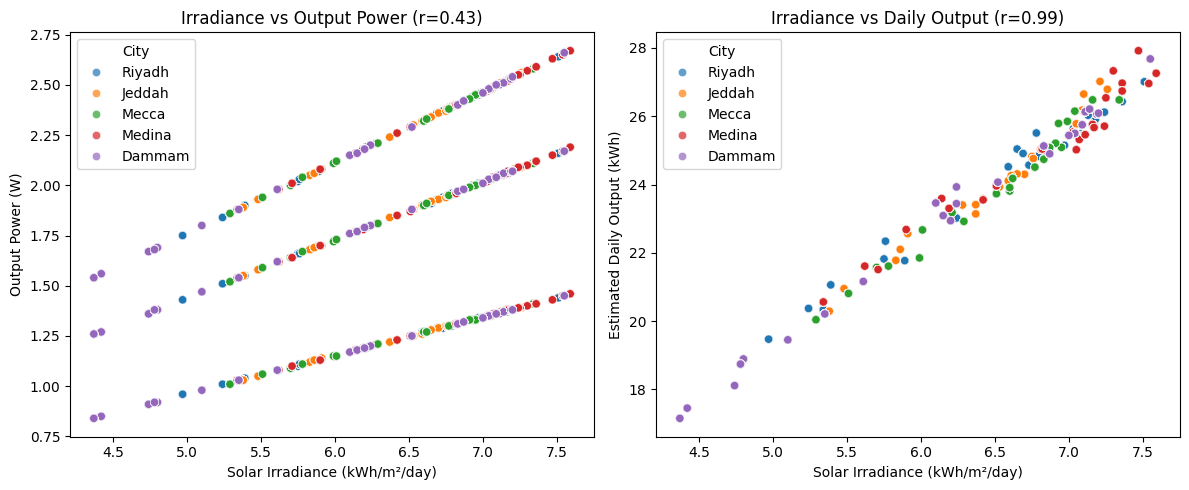

In [ ]:
corr_irradiance_output = df['Solar Irradiance (kWh/m²/day)'].corr(df['Output Power (W)'])
corr_irradiance_est = df['Solar Irradiance (kWh/m²/day)'].corr(df['Estimated Daily Output (kWh)'])

print(f"Korelasi Solar Irradiance dengan Output Power: {corr_irradiance_output:.3f}")
print(f"Korelasi Solar Irradiance dengan Estimated Daily Output: {corr_irradiance_est:.3f}")

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(data=df, x='Solar Irradiance (kWh/m²/day)', y='Output Power (W)', hue='City', ax=axes[0], alpha=0.7)
sns.scatterplot(data=df, x='Solar Irradiance (kWh/m²/day)', y='Estimated Daily Output (kWh)', hue='City', ax=axes[1], alpha=0.7)
axes[0].set_title(f'Irradiance vs Output Power (r={corr_irradiance_output:.2f})')
axes[1].set_title(f'Irradiance vs Daily Output (r={corr_irradiance_est:.2f})')
plt.tight_layout()
plt.show()

Suhu tidak berpengaruh signifikan terhadap efisiensi panel (r ≈ 0). Efisiensi relatif stabil terhadap variasi suhu di 5 kota Saudi Arabia. Iradiasi berpengaruh nayat terhadap performa panel surya. Berpengaruh sedang terhadap instaneous output power (r = 0.43) dan berpengaruh kuat terhadap output energi harian.

# KORELASI TIPE PANEL VS PERFORMA ENERGI

Analisis performa berdasarkan tipe panel

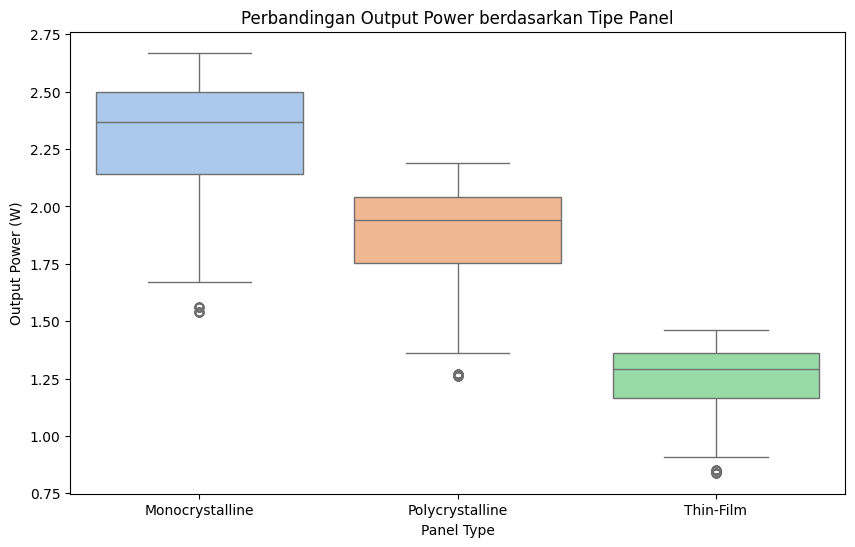

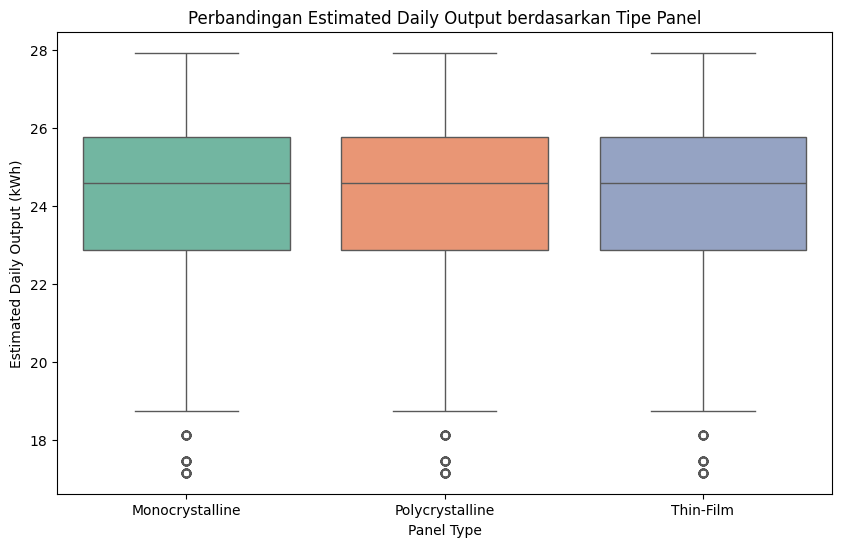

Rata-rata performa tiap tipe panel surya :


,Output Power (W),Estimated Daily Output (kWh)
Panel Type,,
Monocrystalline,2.29,24.04
Polycrystalline,1.88,24.04
Thin-Film,1.25,24.04



Keterangan:
- 'Output Power (W)' menunjukkan daya listrik rata-rata yang dihasilkan oleh setiap tipe panel.
- 'Estimated Daily Output (kWh)' menunjukkan estimasi produksi energi harian rata-rata per tipe panel.


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='Panel Type',
    y='Output Power (W)',
    hue='Panel Type',
    palette='pastel',
    legend=False
)
plt.title('Perbandingan Output Power berdasarkan Tipe Panel')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='Panel Type',
    y='Estimated Daily Output (kWh)',
    hue='Panel Type',
    palette='Set2',
    legend=False
)
plt.title('Perbandingan Estimated Daily Output berdasarkan Tipe Panel')
plt.show()

panel_perf = (
    df.groupby('Panel Type', observed=True)[['Output Power (W)', 'Estimated Daily Output (kWh)']]
    .mean()
    .round(2)
)

print("Rata-rata performa tiap tipe panel surya :")
display(panel_perf)

print(
    "\nKeterangan:\n"
    "- 'Output Power (W)' menunjukkan daya listrik rata-rata yang dihasilkan oleh setiap tipe panel.\n"
    "- 'Estimated Daily Output (kWh)' menunjukkan estimasi produksi energi harian rata-rata per tipe panel."
)

Grafik menampilkan performa tiga jenis panel surya, yaitu monocrystalline, polycrystalline, dan thin-film. Dari ketiganya, monocrystalline lebih unggul dalam hal daya keluaran dan kestabilan performa, menjadikannya pilihan terbaik untuk efisiensi tinggi meskipun biayanya biasnaya lebih mahal. Polycrystalline berada di posisi tengah, performanya stabil dan ekonomis, cocok untuk aplikasi umum. Sedangkan thin-film memiliki efisiensi terendah , namun dapat berguna di tempat dengan suhu tinggi.

# KORELASI LOKASI GEOGRAFIS (CITY) VS OUTPUT ENERGI

Analisis perbandingan output energi antar kota

Rata-rata Solar Irradiance dan Estimated Daily Output per Kota :


,Solar Irradiance (kWh/m²/day),Estimated Daily Output (kWh)
City,,
Dammam,6.15,22.96
Jeddah,6.53,24.15
Mecca,6.53,23.99
Medina,6.80,24.96
Riyadh,6.54,24.15



Keterangan:
- 'Solar Irradiance (kWh/m²/day)' menunjukkan rata-rata intensitas radiasi matahari di tiap kota.
- 'Estimated Daily Output (kWh)' menunjukkan rata-rata estimasi energi listrik harian yang dihasilkan panel surya di kota tersebut.


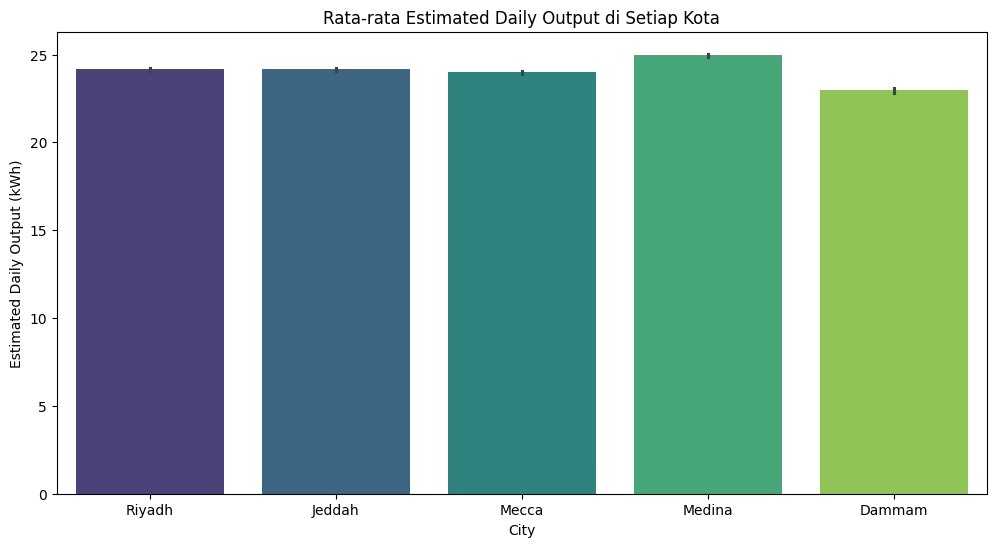

In [ ]:
city_output = (
    df.groupby('City', observed=True)[['Solar Irradiance (kWh/m²/day)', 'Estimated Daily Output (kWh)']]
    .mean()
    .round(2)
)

print("Rata-rata Solar Irradiance dan Estimated Daily Output per Kota :")
display(city_output)

print(
    "\nKeterangan:\n"
    "- 'Solar Irradiance (kWh/m²/day)' menunjukkan rata-rata intensitas radiasi matahari di tiap kota.\n"
    "- 'Estimated Daily Output (kWh)' menunjukkan rata-rata estimasi energi listrik harian yang dihasilkan panel surya di kota tersebut."
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='City',
    y='Estimated Daily Output (kWh)',
    hue='City',
    palette='viridis',
    legend=False
)
plt.title('Rata-rata Estimated Daily Output di Setiap Kota')
plt.xlabel('City')
plt.ylabel('Estimated Daily Output (kWh)')
plt.show()

Tingkat penyinaran matahari (solar irradiance) berpengaruh langsung terhadap energi yang dihasilkan sistem surya (daily output).
Artinya, semakin tinggi intensitas sinar matahari yang diterima suatu daerah, semakin besar pula listrik yang bisa dihasilkan oleh panel surya.

# KORELASI MOUNTING CONFIGURATION VS EFISIENSI PANEL

Analisis korelasi mounting configuration terhadap efisiensi

Rata-rata Efisiensi Panel berdasarkan Mount Type :


,Panel Efficiency (%)
Mount Type,
Ground,17.33
Rooftop,17.33



Keterangan:
- Menunjukkan efisiensi rata-rata panel surya untuk setiap konfigurasi pemasangan.
- 'Rooftop' = dipasang di atap bangunan.
- 'Ground'  = dipasang di permukaan tanah atau struktur datar.



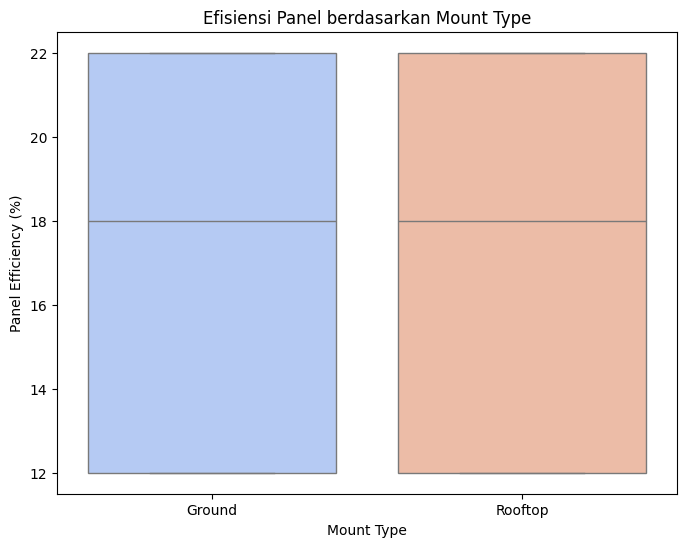

In [ ]:
mount_eff = (
    df.groupby('Mount Type', observed=True)['Panel Efficiency (%)']
    .mean()
    .round(2)
)

print("Rata-rata Efisiensi Panel berdasarkan Mount Type :")
display(mount_eff)

print(
    "\nKeterangan:\n"
    "- Menunjukkan efisiensi rata-rata panel surya untuk setiap konfigurasi pemasangan.\n"
    "- 'Rooftop' = dipasang di atap bangunan.\n"
    "- 'Ground'  = dipasang di permukaan tanah atau struktur datar.\n"
)

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='Mount Type',
    y='Panel Efficiency (%)',
    hue='Mount Type',
    palette='coolwarm',
    legend=False
)
plt.title('Efisiensi Panel berdasarkan Mount Type')
plt.xlabel('Mount Type')
plt.ylabel('Panel Efficiency (%)')
plt.show()

Nilai rata-rata efisiensi antara Ground-mounted dan Rooftop adalah sama (17.33%). Boxplot menunjukkan rentang nilai yang identik — median, sebaran, dan batas bawah/atas hampir sama persis.

Hal ini berarti jenis pemasangan tidak memberikan pengaruh signifikan terhadap efisiensi panel surya dalam dataset ini.

Kondisi cuaca dan orientasi panel di Arab Saudi umumnya optimal, sehingga perbedaan posisi pemasangan (rooftop atau di ground) tidak mempengaruhi performa panel secara nyata.

Faktor yang lebih dominan terhadap efisiensi biasanya suhu lingkungan, sudut kemiringan, dan perawatan panel, bukan jenis mount-nya.

# PERBANDINGAN ESTIMASI OUTPUT HARIAN DI 5 KOTA ARAB SAUDI


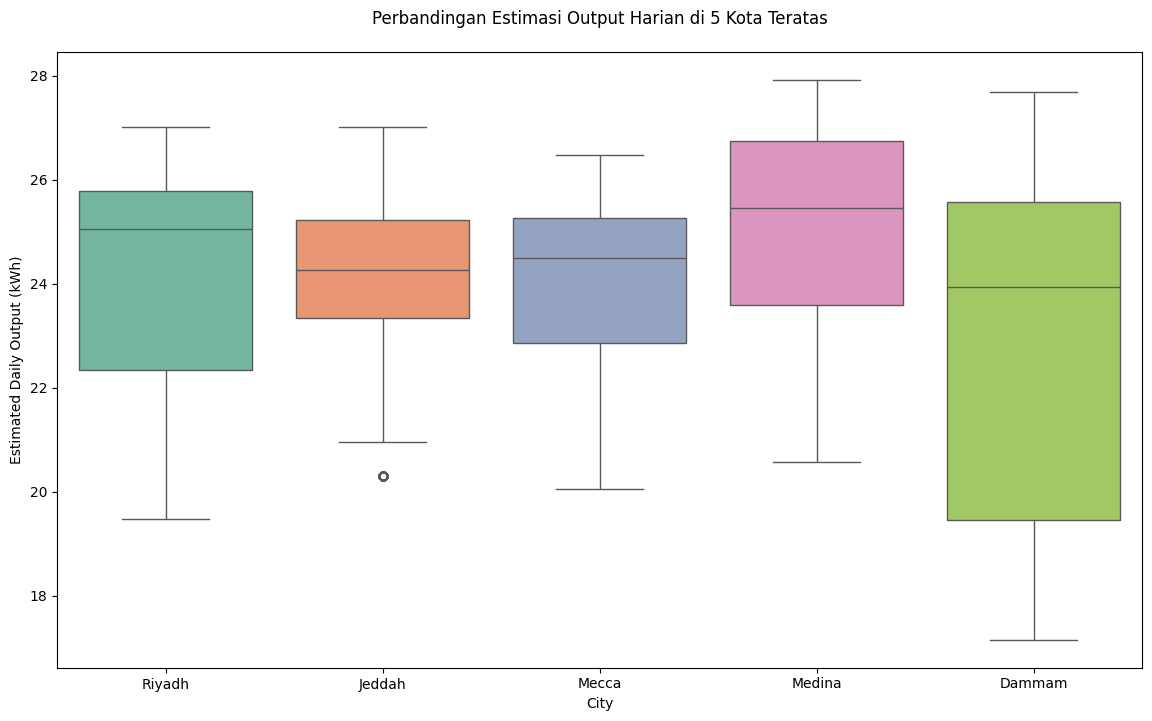

In [ ]:
top_5_cities = df['City'].value_counts().head(5).index
subset = df[df['City'].isin(top_5_cities)]

plt.figure(figsize=(14, 8))
sns.boxplot(
    data=subset,
    x='City',
    y='Estimated Daily Output (kWh)',
    hue='City',
    palette='Set2',
    legend=False
)
plt.title("Perbandingan Estimasi Output Harian di 5 Kota Teratas", pad=20)
plt.xlabel("City")
plt.ylabel("Estimated Daily Output (kWh)")
plt.show()

Kota dengan estimasi iradiasi harian tertinggi adalah Medina (6.7 kWh/m²/day), diikuti Riyadh, Jeddah, Mecca (6.4–6.5 kWh/m²/day). Sedangkan Dammam memiliki iradiasi terendah (6.1 kWh/m²/day). Kondisi lingkungan di Medina sangat mendukung kinerja sistem panel surya.

# PERBANDINGAN RATA-RATA IRADIASI ANTAR KOTA

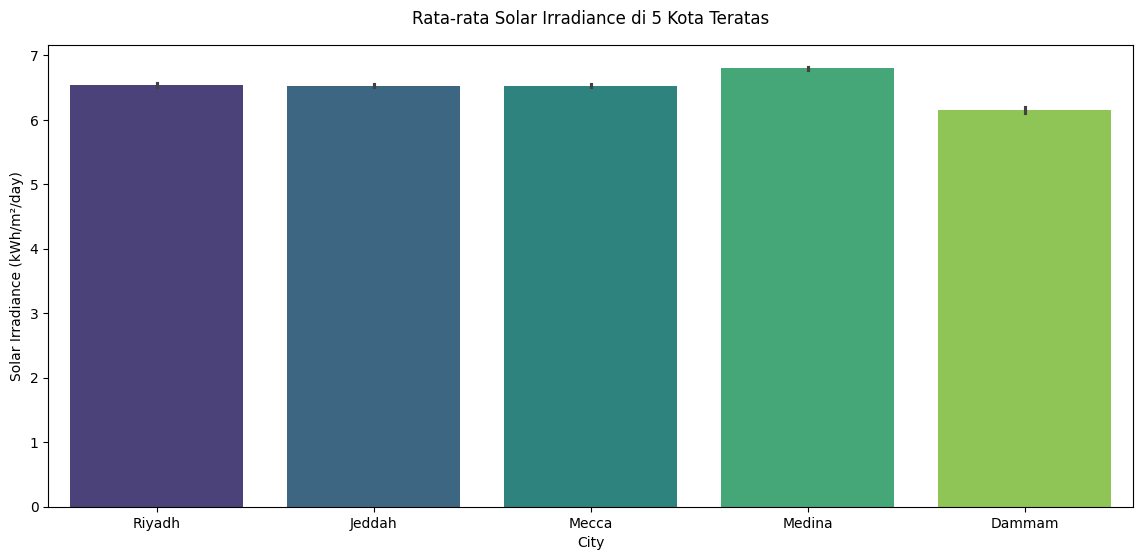

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=subset,
    x='City',
    y='Solar Irradiance (kWh/m²/day)',
    hue='City',
    palette='viridis',
    legend=False
)
plt.title("Rata-rata Solar Irradiance di 5 Kota Teratas", pad=15)
plt.xlabel("City")
plt.ylabel("Solar Irradiance (kWh/m²/day)")
plt.show()

Kota Medina merupakan iradiasi solar tertinggi yang juga menjadi output estimasi harian tertinggi. Hal ini menunjukkan bahwa terdapat korelasi positif pada iradiasi solar dan output estimasi harian. Semakin tinggi penyinaran matahari, semakin tinggi pula energi listrik yang dihasilkan panel surya.

# KESIMPULAN



Secara keseluruhan, faktor paling berpengaruh terhadap kinerja sistem tenaga surya di Arab Saudi adalah intensitas radiasi matahari (irradiance), bukan suhu, jenis pemasangan, atau lokasi panel. Sementara itu, tipe panel surya menjadi variabel penting dalam menentukan efisiensi dan daya keluaran, dengan monocrystalline sebagai pilihan paling efisien untuk kondisi iklim Arab Saudi yang cerah dan panas.